<a href="https://colab.research.google.com/github/OBB-2199/EscapeEarth/blob/main/Interns/Olivia/Final_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## mount google drive to access files

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
## typical imports
%matplotlib inline
!pip install lightkurve==1.9.0 #b/c non-standard library & we want a specific version
import lightkurve as lk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
## import our custom modules

import sys
sys.path.append('/content/gdrive/My Drive/EscapeEarthData/')
import LCAnalysis as lca

In [ ]:
#planet radii calculation fcn
def planet_radii(depth, star_radius):
    import math as m
    R_Sun = 696340000 #m
    R_Earth = 6371000 #m
    r_star = star_radius * R_Sun #b/c in R_Sun units
    radius = r_star * m.sqrt(depth) 
    r_planet = radius / R_Earth #b/c need in R_Earth
    return r_planet

In [ ]:
# candidates with BLS stats
old_candidates = pd.read_csv('/content/gdrive/My Drive/EscapeEarthData/final_candidates_withBLS_stats.csv')
classes_by_eye = pd.read_csv('/content/gdrive/My Drive/EscapeEarthData/Final_candidates_classes.csv')
classes_by_eye

,TIC_EB,TIC_planet,TIC_notransitsordata,correct_depth,new_depth,sector_for_correct_depth,author
0,359675849.0,NaN,NaN,NaN,NaN,NaN,danielle
1,26584043.0,NaN,NaN,yes,NaN,NaN,olivia
2,377192675.0,NaN,NaN,yes,NaN,NaN,danielle
3,27843942.0,NaN,NaN,no,NaN,NaN,olivia
4,26656583.0,NaN,NaN,no,NaN,NaN,olivia
...,...,...,...,...,...,...,...
132,272781956.0,NaN,NaN,no,NaN,NaN,olivia
133,273373712.0,NaN,NaN,no,NaN,NaN,olivia
134,NaN,NaN,273566363.0,NaN,NaN,NaN,olivia
135,NaN,NaN,278075650.0,NaN,NaN,NaN,olivia


In [ ]:
final_planets = pd.read_csv('/content/gdrive/My Drive/EscapeEarthData/final_final_candidates.csv')
final_planets

,ID,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,...,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID,ABS Mag,TIC,Period,Duration,Transit Time,Power,Depth,Sector
0,28230919,20190415,97657.0,3561-02092-1,691-070316,19505021+4804508,NaN,NaN,2086512227851023872,54470133.0,10748390.0,STAR,tmgaia2,297.709364,48.080860,tmgaia2,125.98400,0.040610,232.98800,0.044990,gaia2,26.45080,0.023446,gaia2,81.833703,10.772381,321.548036,66.629442,10.556,0.141,9.460,0.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.051426,0.045157,0.418599,0.455017,0.080525,0.092496,0.009814,0.008251,0.0336,0.0337,bj2018,107.360,118.3730,spect,9.74374,0.001652,8.46507,0.001891,1,NaN,hipvmag,apassdr9,NaN,0.689515,0.697757,297.710176,48.081864,0.019271,0.024141,1,0,347873767,6.263174,28230919,4.887335,0.074,3.860,620,0.002252,14
1,28230919,20190415,97657.0,3561-02092-1,691-070316,19505021+4804508,NaN,NaN,2086512227851023872,54470133.0,10748390.0,STAR,tmgaia2,297.709364,48.080860,tmgaia2,125.98400,0.040610,232.98800,0.044990,gaia2,26.45080,0.023446,gaia2,81.833703,10.772381,321.548036,66.629442,10.556,0.141,9.460,0.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.051426,0.045157,0.418599,0.455017,0.080525,0.092496,0.009814,0.008251,0.0336,0.0337,bj2018,107.360,118.3730,spect,9.74374,0.001652,8.46507,0.001891,1,NaN,hipvmag,apassdr9,NaN,0.689515,0.697757,297.710176,48.081864,0.019271,0.024141,1,0,347873767,6.263174,28230919,0.299916,0.298,0.149,0,0.002252,15
2,27915909,20190415,NaN,3561-00922-1,693-071357,19471820+4826361,NaN,J194718.22+482636.1,2086643104093265792,54466249.0,10987439.0,STAR,tmgaia2,296.825880,48.443339,tmgaia2,12.23340,0.059813,4.96015,0.060169,gaia2,2.67200,0.031236,gaia2,81.871846,11.462243,320.649452,67.223843,11.314,0.109,10.689,0.007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.089318,0.128627,0.052317,0.057282,0.097923,0.104853,0.323779,0.293419,4.2670,4.3660,bj2018,175.361,148.1350,spect,11.02350,0.000878,10.33890,0.000641,1,NaN,tycho2v3,tycho2b3,NaN,1.016970,0.933177,296.825959,48.443360,0.027646,0.032123,1,0,338972385,2.882082,27915909,10.696316,0.106,8.836,794,0.005749,14
3,27915909,20190415,NaN,3561-00922-1,693-071357,19471820+4826361,NaN,J194718.22+482636.1,2086643104093265792,54466249.0,10987439.0,STAR,tmgaia2,296.825880,48.443339,tmgaia2,12.23340,0.059813,4.96015,0.060169,gaia2,2.67200,0.031236,gaia2,81.871846,11.462243,320.649452,67.223843,11.314,0.109,10.689,0.007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.089318,0.128627,0.052317,0.057282,0.097923,0.104853,0.323779,0.293419,4.2670,4.3660,bj2018,175.361,148.1350,spect,11.02350,0.000878,10.33890,0.000641,1,NaN,tycho2v3,tycho2b3,NaN,1.016970,0.933177,296.825959,48.443360,0.027646,0.032123,1,0,338972385,2.882082,27915909,10.696316,0.106,7.277,794,0.005749,15
4,147950620,20190415,NaN,4385-00509-1,800-020583,11111689+6957527,NaN,J111117.07+695753.0,1074139748425931008,59749525.0,NaN,STAR,tmgaia2,167.820482,69.964708,tmgaia2,79.48610,0.044630,15.42790,0.044499,gaia2,6.65269,0.028894,gaia2,134.723430,44.800633,127.273801,56.429544,11.818,0.145,11.302,0.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.038358,0.073240,0.207177,0.251468,0.076626,0.094575,0.015542,0.021492,0.6490,0.6550,bj2018,156.062,92.9382,dered,11.41740,0.001835,10.43290,0.000882,1,NaN,tycho2v3,tycho2b3,NaN,0.844670,0.690160,167.821481,69.964775,0.024943,0.024441,1,0,142679053,5.103686,147950620,2.314992,0.074,1.551,454,0.005000,14
5,148914726,20190415,NaN,4161-00688-1,787-021690,12281343+6714239,1.237651e+18,J122813.41+671423.9,1680911012650126848,59593798.0,NaN,STAR,tmgaia2,187.055970,67.239983,tmgaia2,-6.57786,0.041855,13.82290,0.0

In [ ]:
import sys
sys.path.append('/content/gdrive/My Drive/EscapeEarthData/')
import LCAnalysis_test as lca

1. Full/Folded lc example of Exoplanet transit
2. Full/Folded lc example of EB transit

In [ ]:
count = 0

tics = final_planets['ID'].to_numpy() #all targets
tic = tics[count]#target I'm looking at

sector = 14
mydata = [tic,sector]

starclass = lca.LCAnalysis(mydata) #initate class
starclass #verify its a class object now

TIC: 28230919

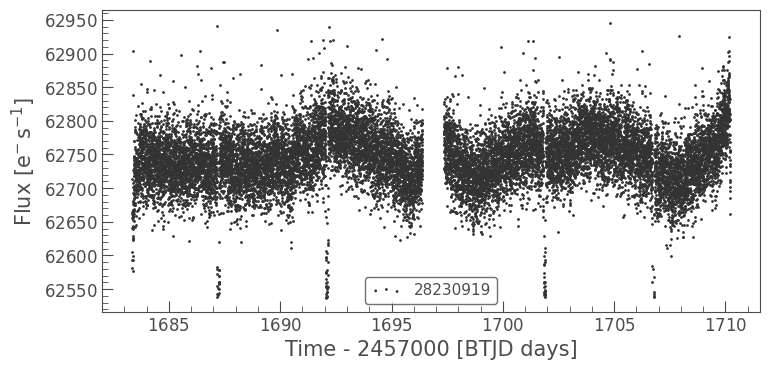

In [ ]:
%matplotlib inline
lc = starclass.open_clean_lc()
lc.scatter()
# plt.savefig('/content/gdrive/My Drive/EscapeEarthData/Planet1_lc.png' )

4.887334589468021


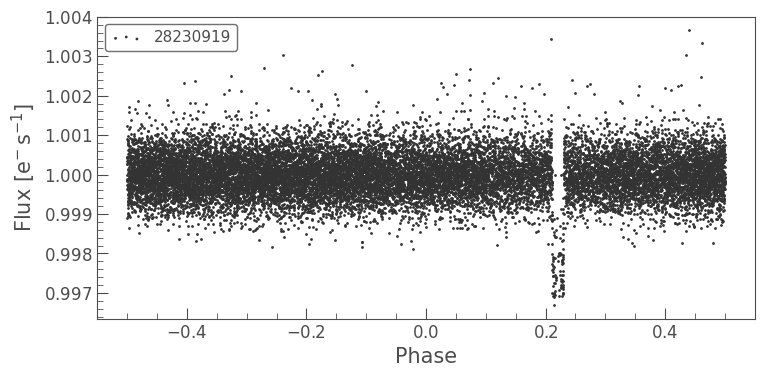

In [ ]:
period = final_planets['Period'].iloc[count]
print(period)
folded_lc = starclass.folded(period)
folded_lc.plot()
# plt.savefig('/content/gdrive/My Drive/EscapeEarthData/Planet1_folded_lc.png' )

In [ ]:
candidates = pd.read_csv('/content/gdrive/My Drive/EscapeEarthData/final_candidates.csv')

#open bls results to merge with candiate df
bls_results = pd.read_csv('/content/gdrive/My Drive/EscapeEarthData/main_df.csv')

# merge dataframe
df = pd.merge(candidates,bls_results, left_on = 'ID', right_on='TIC')
#df

In [ ]:
count = 130
#0,70,73,130

#110/130 look cool
tics = df['TIC'].to_numpy() #all targets
tic = tics[count]#target I'm looking at

sector = 14
mydata = [tic,sector]

starclass = lca.LCAnalysis(mydata) #initate class
starclass #verify its a class object now

TIC: 239290086

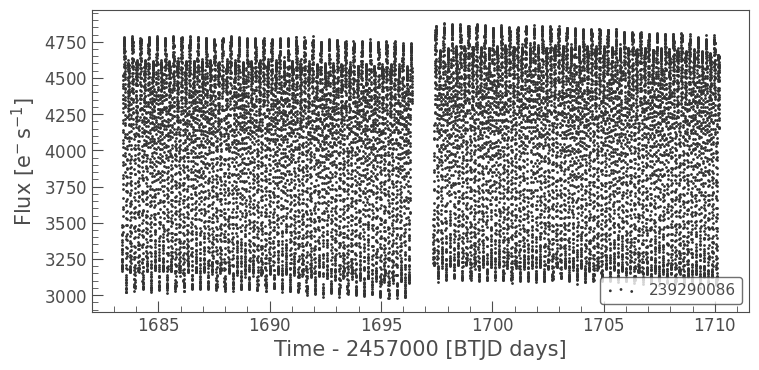

In [ ]:
%matplotlib inline
lc = starclass.open_clean_lc()
lc.scatter()
# plt.savefig('/content/gdrive/My Drive/EscapeEarthData/Binary1_lc.png' )

0.3067430805462068


[]

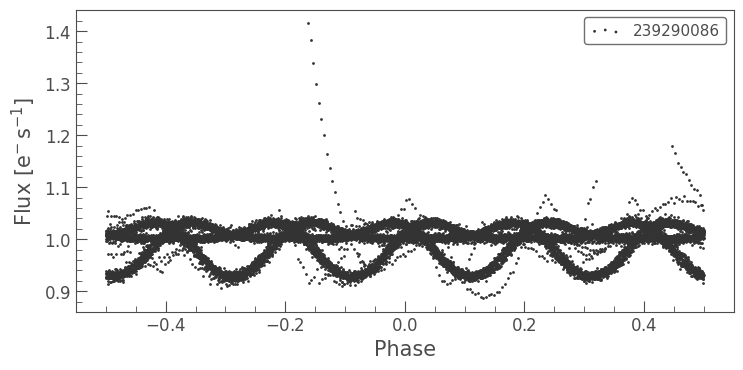

In [ ]:
period = df['Period'].iloc[count]
print(period)
folded_lc = starclass.folded(period)
folded_lc.plot()
# plt.savefig('/content/gdrive/My Drive/EscapeEarthData/Binary1_folded_lc.png' )